# LIBRARY IMPORTATION 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.spatial.distance import cdist
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")

#  DATA IMPORTATION

In [2]:
# from google.colab import files
# files.upload()

In [3]:
df=pd.read_csv('data_features.csv')

#  DATA EXPLORATION

In [4]:
df.tail()

,Unnamed: 0,idEye,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,...,coma.5,coma.axis.5,SA.C40..5,S35.coma.like..5,S46.sph..like..5,HOAs.S3456..5,AA.5,En.Anterior.,ESI.Anterior.,ESI.Posterior.
3157,12238,1812OD(Right),46.60,86,45.79,176,46.19,0.81,97.0,0.75,...,0.384,339,0.164,0.583,0.259,0.638,100,Enable,0,10
3158,12239,1813OS(Left),44.05,82,43.90,172,43.97,0.15,96.4,0.63,...,0.156,217,0.242,0.388,0.387,0.548,100,Enable,0,5
3159,12240,1813OD(Right),44.12,3,43.47,93,43.80,0.66,96.6,0.60,...,0.179,337,0.348,0.313,0.384,0.495,100,Enable,0,0
3160,12241,1814OS(Left),46.59,90,44.74,0,45.66,1.86,96.1,0.74,...,0.609,113,-0.124,1.092,0.842,1.379,100,Enable,0,0
3161,12242,1814OD(Right),46.49,79,45.38,169,45.93,1.11,96.5,0.73,...,0.280,56,0.001,0.726,0.348,0.805,100,Enable,0,0


In [5]:
df.corr()

,Unnamed: 0,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,ACCP,...,HOAs.S3456..4,coma.5,coma.axis.5,SA.C40..5,S35.coma.like..5,S46.sph..like..5,HOAs.S3456..5,AA.5,ESI.Anterior.,ESI.Posterior.
Unnamed: 0,1.000000,0.018657,0.005378,0.041391,-0.027008,0.030032,-0.026590,0.055788,0.065304,0.033429,...,-0.028947,-0.051321,0.000787,-0.008355,-0.042828,-0.025929,-0.037957,0.022419,-0.029368,-0.070759
Ks,0.018657,1.000000,-0.017769,0.837768,-0.010570,0.967318,0.597954,-0.096478,0.109472,0.952004,...,0.482569,0.544670,-0.070731,-0.478718,0.509430,0.480909,0.514382,-0.026284,0.637944,0.447764
Ks.Axis,0.005378,-0.017769,1.000000,-0.024464,-0.358106,-0.021670,0.003431,-0.019404,-0.001638,-0.022171,...,0.014781,0.015849,-0.002412,-0.004745,0.008371,0.002738,0.006615,-0.001081,0.021585,0.009688
Kf,0.041391,0.837768,-0.024464,1.000000,-0.002021,0.948840,0.063293,-0.020611,0.371418,0.960414,...,0.206272,0.273314,-0.062414,-0.389556,0.180236,0.171338,0.184511,0.071734,0.390755,0.249240
Kf.Axis,-0.027008,-0.010570,-0.358106,-0.002021,1.000000,-0.007053,-0.016381,0.040748,-0.005046,-0.006600,...,-0.012786,-0.011870,0.005512,0.027738,-0.011254,-0.001295,-0.008066,0.003303,-0.013326,-0.011864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S46.sph..like..5,-0.025929,0.480909,0.002738,0.171338,-0.001295,0.357649,0.627464,-0.159008,-0.231614,0.309754,...,0.900412,0.734258,-0.002629,-0.476212,0.904709,1.000000,0.953986,-0.234767,0.627862,0.468733
HOAs.S3456..5,-0.037957,0.514382,0.006615,0.184511,-0.008066,0.383119,0.669298,-0.164310,-0.291107,0.326960,...,0.918921,0.851642,-0.021153,-0.455863,0.990281,0.953986,1.000000,-0.212321,0.719228,0.511998
AA.5,0.022419,-0.026284,-0.001081,0.071734,0.003303,0.018081,-0.153343,0.452597,0.112421,0.029936,...,-0.151861,-0.134180,-0.001123,0.060522,-0.198097,-0.234767,-0.212321,1.000000,-0.106445,-0.066702
ESI.Anterior.,-0.029368,0.637944,0.021585,0.390755,-0.013326,0.550338,0.592373,-0.105910,-0.178718,0.519467,...,0.640037,0.819960,-0.061430,-0.368364,0.732868,0.627862,0.719228,-0.106445,1.000000,0.613171


In [6]:
df.describe()

,Unnamed: 0,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,ACCP,...,HOAs.S3456..4,coma.5,coma.axis.5,SA.C40..5,S35.coma.like..5,S46.sph..like..5,HOAs.S3456..5,AA.5,ESI.Anterior.,ESI.Posterior.
count,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,...,3162.00000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000
mean,7455.013599,45.389712,90.914611,43.843495,85.449715,44.616521,1.546275,95.610626,0.523526,44.571834,...,0.64360,0.629779,170.340923,0.185911,1.067495,0.749348,1.330833,99.921252,5.567995,8.851044
std,3346.302814,3.471090,53.893491,2.787700,55.135984,3.001295,1.899108,3.711964,0.325721,2.946320,...,1.26221,1.118622,101.159626,0.589008,1.800681,1.187925,2.140924,0.696489,18.705326,19.258172
min,9.000000,33.450000,0.000000,26.400000,0.000000,29.930000,0.020000,47.400000,-0.930000,30.460000,...,0.13000,0.003000,0.000000,-10.508000,0.088000,0.135000,0.221000,79.000000,0.000000,0.000000
25%,4829.250000,43.842500,49.000000,42.580000,34.000000,43.260000,0.570000,95.000000,0.480000,43.250000,...,0.25825,0.206250,87.000000,0.117000,0.412000,0.342000,0.568000,100.000000,0.000000,0.000000
50%,7762.500000,44.970000,92.000000,43.790000,87.000000,44.370000,1.000000,96.900000,0.590000,44.350000,...,0.33100,0.332000,151.000000,0.235000,0.564500,0.434000,0.717000,100.000000,0.000000,0.000000
75%,10439.750000,46.140000,133.000000,44.900000,127.000000,45.520000,1.720000,97.700000,0.680000,45.510000,...,0.48900,0.575000,264.000000,0.346000,0.880750,0.630000,1.067750,100.000000,0.000000,7.000000
max,12242.000000,83.750000,180.000000,77.160000,179.000000,80.450000,20.470000,98.500000,1.610000,80.890000,...,22.94400,15.967000,359.000000,3.659000,30.185000,20.254000,33.921000,100.000000,95.000000,95.000000


In [7]:
df.shape

(3162, 448)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Columns: 448 entries, Unnamed: 0 to ESI.Posterior.
dtypes: float64(319), int64(127), object(2)
memory usage: 10.8+ MB


In [9]:
df.shape

(3162, 448)

#  DATA PREPROCESSING 

In [10]:
eye_labels=df['idEye']
df=df.dropna()
df=df.drop(['Unnamed: 0','idEye','En.Anterior.'],axis=1)
df=df.iloc[:,10:300]
data=df.values
s_p=np.count_nonzero(data<0.01)/data.size
print('Sparsity Ratio:',s_p)
ds=np.count_nonzero(data)/data.size
print('Density:',ds)

Sparsity Ratio: 0.17683373683177386
Density: 0.977171803092761


In [11]:
scaler=StandardScaler()
scaled_d=scaler.fit_transform(df)

#  Dimensionality Reduction

In [12]:
pca=PCA(n_components=8,random_state=42)
pca.fit(scaled_d)
pca_data=pca.fit_transform(scaled_d)

In [13]:
pca.explained_variance_ratio_

array([0.28760464, 0.11049818, 0.05903952, 0.04279979, 0.04060043,
       0.03488768, 0.02712414, 0.0247582 ])

In [14]:
tsne=TSNE(n_components=2)
tsne_data=tsne.fit_transform(pca_data)

Text(0, 0.5, 'Cummulative Explained Variance')

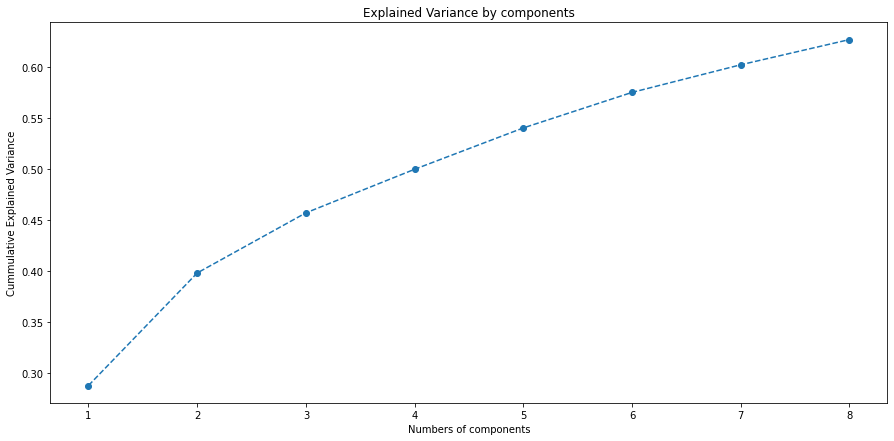

In [15]:
plt.figure(figsize=(15,7))
plt.plot(range(1,9),pca.explained_variance_ratio_.cumsum(),marker='o', linestyle='--')
plt.title('Explained Variance by components')
plt.xlabel('Numbers of components')
plt.ylabel('Cummulative Explained Variance')

#  Selecting Number of Estimations using Elbow Method

In [16]:

plt.rcParams['font.size']=8
plt.rc('axes',titlesize=30)
plt.rc('axes',labelsize=15)
plt.rcParams['text.color']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'

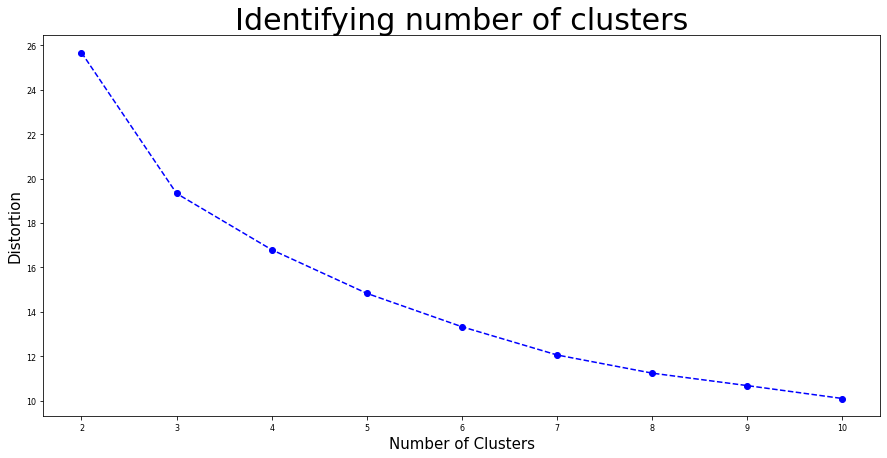

In [17]:
plt.figure(figsize=(15,7))
s=[]
k=[x for x in range(2,11)]
for x in k:
    kmeans=KMeans(n_clusters=x,init='k-means++')
    kmeans.fit(tsne_data)
    s.append(sum(np.min(cdist(tsne_data,kmeans.cluster_centers_,'euclidean'),axis=1))/tsne_data.shape[0])
plt.plot(k,s,'bo--')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Identifying number of clusters')
plt.show()

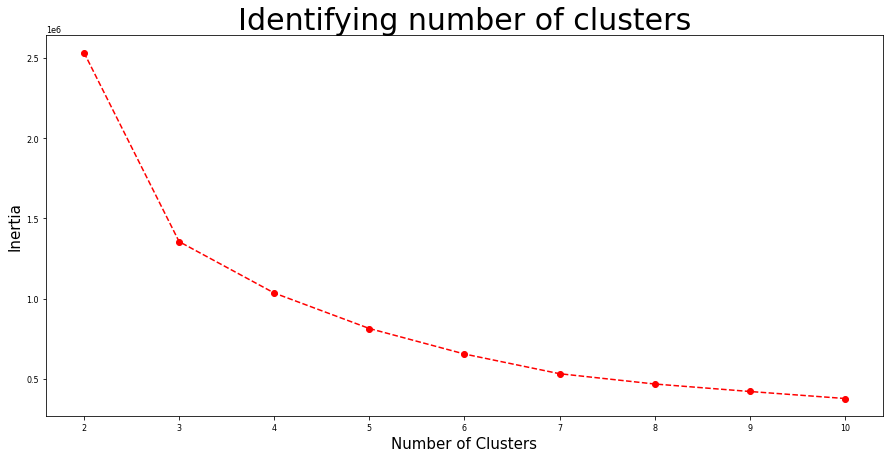

In [18]:
plt.figure(figsize=(15,7))
s=[]
k=[x for x in range(2,11)]
for x in k:
    kmeans=KMeans(n_clusters=x,init='k-means++')
    kmeans.fit(tsne_data)
    s.append(kmeans.inertia_)
plt.plot(k,s,'ro--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Identifying number of clusters')
plt.show()

## # # # # # # # # # # # # # #   DEVELOPEMT OF ALGORITHMS # # # # # # # # # # # # # # # # # # 

#  Development of K-means Algorithm

K means Silhouette Score: 0.47499436
K means Calinski-Harabasz Score: 3652.14783727761
K means Davies-Bouldin Index : 0.7107033107946426


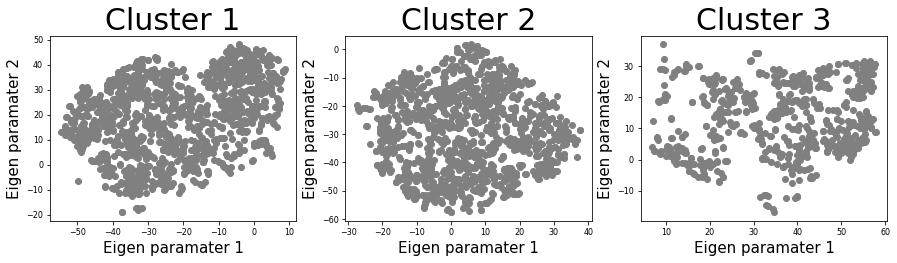

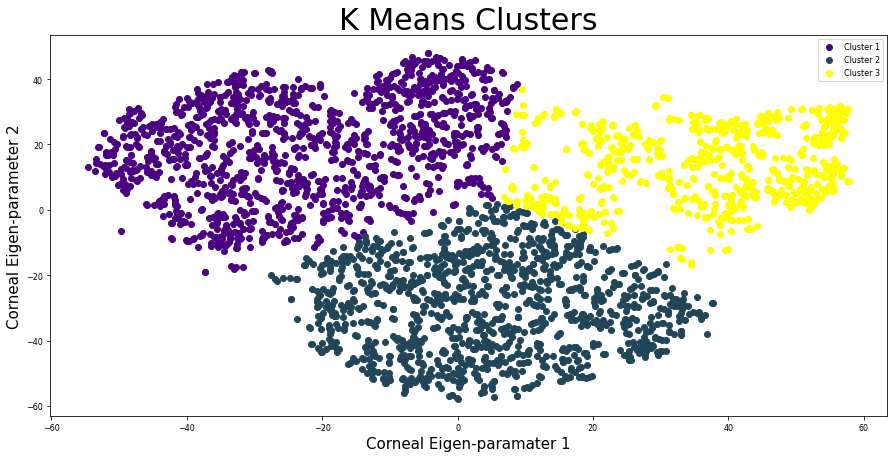

In [19]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42,max_iter=300)
kmeans.fit(tsne_data)
kmeans_pred=kmeans.predict(tsne_data)
print('K means Silhouette Score:',silhouette_score(tsne_data,kmeans_pred))
print('K means Calinski-Harabasz Score:',calinski_harabasz_score(tsne_data,kmeans_pred))
print('K means Davies-Bouldin Index :',davies_bouldin_score(tsne_data,kmeans_pred))
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,3.4))
ax1.scatter(tsne_data[kmeans_pred==0,0],tsne_data[kmeans_pred==0,1],c='gray')
ax1.set_title('Cluster 1')
ax1.set_xlabel('Eigen paramater 1')
ax1.set_ylabel('Eigen paramater 2')
ax2.scatter(tsne_data[kmeans_pred==1,0],tsne_data[kmeans_pred==1,1],c='gray')
ax2.set_title('Cluster 2')
ax2.set_xlabel('Eigen paramater 1')
ax2.set_ylabel('Eigen paramater 2')
ax3.scatter(tsne_data[kmeans_pred==2,0],tsne_data[kmeans_pred==2,1],c='gray')
ax3.set_title('Cluster 3')
ax3.set_xlabel('Eigen paramater 1')
ax3.set_ylabel('Eigen paramater 2')
plt.figure(figsize=(15,7))
plt.subplot
plt.scatter(tsne_data[kmeans_pred==0,0],tsne_data[kmeans_pred==0,1],c='indigo')
plt.scatter(tsne_data[kmeans_pred==1,0],tsne_data[kmeans_pred==1,1],c='#214659')
plt.scatter(tsne_data[kmeans_pred==2,0],tsne_data[kmeans_pred==2,1],c='yellow')
plt.xlabel('Corneal Eigen-paramater 1')
plt.ylabel('Corneal Eigen-parameter 2')
plt.title('K Means Clusters')
plt.legend(['Cluster 1','Cluster 2','Cluster 3'])
plt.show()

# Development of DBSCAN model

DBCSAN Silhouette Score: 0.32454696
DBCSAN Calinski-Harabasz Score: 1830.3380294238616
DBCSAN Davies-Bouldin Index : 1.5805655783077524


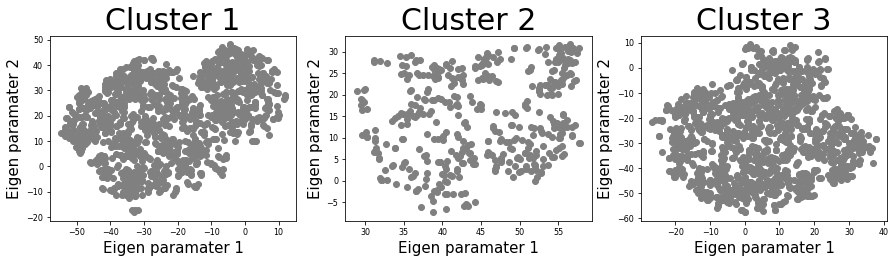

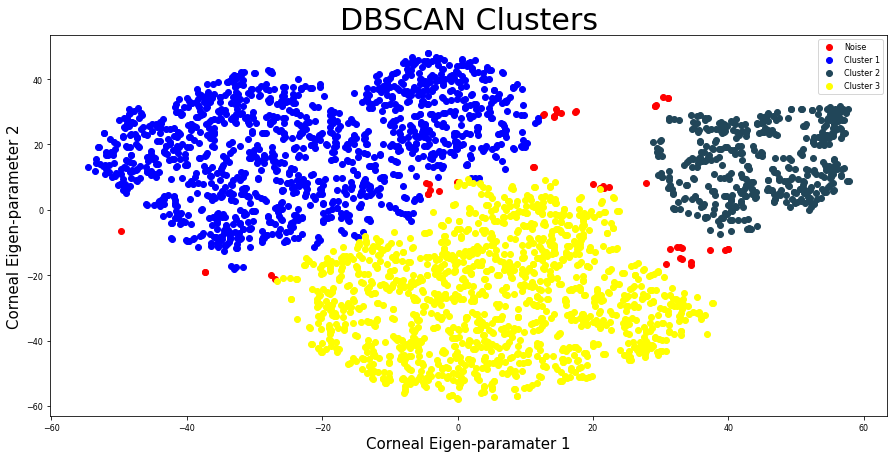

In [20]:
dbscan=DBSCAN(eps=7,min_samples=57)
dbscan_pred=dbscan.fit_predict(tsne_data)
print('DBCSAN Silhouette Score:',silhouette_score(tsne_data,dbscan_pred))
print('DBCSAN Calinski-Harabasz Score:',calinski_harabasz_score(tsne_data,dbscan_pred))
print('DBCSAN Davies-Bouldin Index :',davies_bouldin_score(tsne_data,dbscan_pred))
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,3.4))
ax1.scatter(tsne_data[dbscan_pred==0,0],tsne_data[dbscan_pred==0,1],c='gray')
ax1.set_title('Cluster 1')
ax1.set_xlabel('Eigen paramater 1')
ax1.set_ylabel('Eigen paramater 2')
ax2.scatter(tsne_data[dbscan_pred==1,0],tsne_data[dbscan_pred==1,1],c='gray')
ax2.set_title('Cluster 2')
ax2.set_xlabel('Eigen paramater 1')
ax2.set_ylabel('Eigen paramater 2')
ax3.scatter(tsne_data[dbscan_pred==2,0],tsne_data[dbscan_pred==2,1],c='gray')
ax3.set_title('Cluster 3')
ax3.set_xlabel('Eigen paramater 1')
ax3.set_ylabel('Eigen paramater 2')
plt.figure(figsize=(15,7))
plt.subplot
plt.scatter(tsne_data[dbscan_pred==-1,0],tsne_data[dbscan_pred==-1,1],c='red')
plt.scatter(tsne_data[dbscan_pred==0,0],tsne_data[dbscan_pred==0,1],c='blue')
plt.scatter(tsne_data[dbscan_pred==1,0],tsne_data[dbscan_pred==1,1],c='#214659')
plt.scatter(tsne_data[dbscan_pred==2,0],tsne_data[dbscan_pred==2,1],c='yellow')
plt.xlabel('Corneal Eigen-paramater 1')
plt.ylabel('Corneal Eigen-parameter 2')
plt.title('DBSCAN Clusters')
plt.legend(['Noise','Cluster 1','Cluster 2','Cluster 3'])
plt.show()

# GMM Algorithm

GMM Silhouette Score: 0.47599545
GMM Calinski-Harabasz Score: 3573.245186693901
GMM Davies-Bouldin Index : 0.7162657303483871


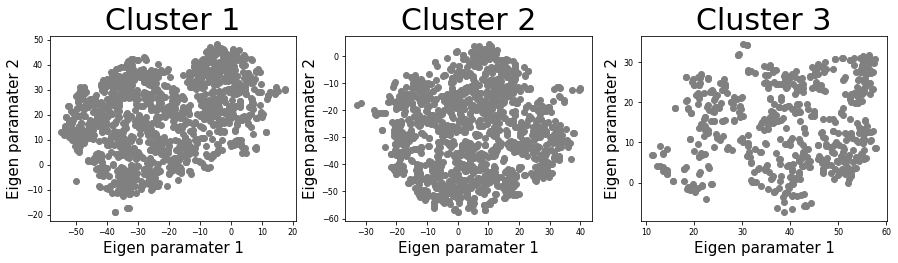

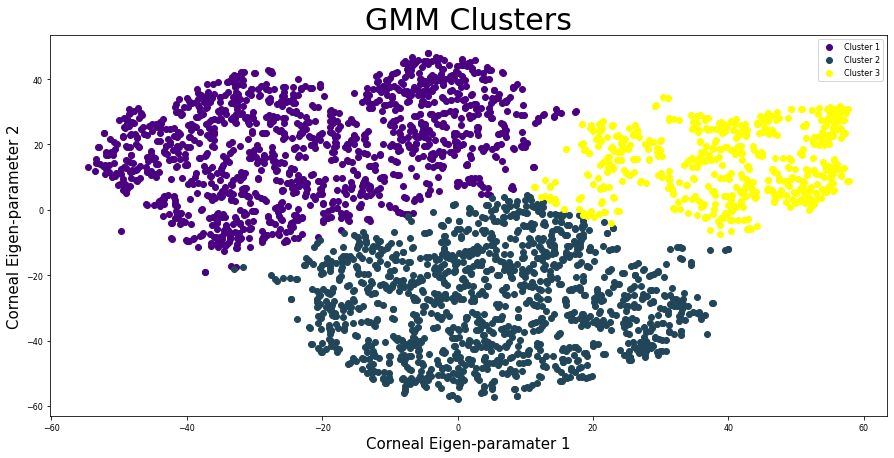

In [21]:
gmm=GaussianMixture(n_components=3,random_state=42)
gmm.fit(tsne_data)
gmm_pred=gmm.predict(tsne_data)
print('GMM Silhouette Score:',silhouette_score(tsne_data,gmm_pred))
print('GMM Calinski-Harabasz Score:',calinski_harabasz_score(tsne_data,gmm_pred))
print('GMM Davies-Bouldin Index :',davies_bouldin_score(tsne_data,gmm_pred))
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,3.4))
ax1.scatter(tsne_data[gmm_pred==0,0],tsne_data[gmm_pred==0,1],c='gray')
ax1.set_title('Cluster 1')
ax1.set_xlabel('Eigen paramater 1')
ax1.set_ylabel('Eigen paramater 2')
ax2.scatter(tsne_data[gmm_pred==1,0],tsne_data[gmm_pred==1,1],c='gray')
ax2.set_title('Cluster 2')
ax2.set_xlabel('Eigen paramater 1')
ax2.set_ylabel('Eigen paramater 2')
ax3.scatter(tsne_data[gmm_pred==2,0],tsne_data[gmm_pred==2,1],c='gray')
ax3.set_title('Cluster 3')
ax3.set_xlabel('Eigen paramater 1')
ax3.set_ylabel('Eigen paramater 2')
plt.figure(figsize=(15,7))
plt.scatter(tsne_data[gmm_pred==0,0],tsne_data[gmm_pred==0,1],c='indigo')
plt.scatter(tsne_data[gmm_pred==1,0],tsne_data[gmm_pred==1,1],c='#214659')
plt.scatter(tsne_data[gmm_pred==2,0],tsne_data[gmm_pred==2,1],c='yellow')
plt.xlabel('Corneal Eigen-paramater 1')
plt.ylabel('Corneal Eigen-parameter 2')
plt.title('GMM Clusters')
plt.legend(['Cluster 1','Cluster 2','Cluster 3'])
plt.show()

In [22]:
kmeans_params = {
    'init': ['k-means++', 'random'],
    'max_iter': [100, 200, 300]
}
kmeans_grid = GridSearchCV(kmeans, kmeans_params, cv=5)
kmeans_grid.fit(tsne_data)

dbscan_params = {
    'eps': [7,9,10],
    'min_samples': [x for x in range(57,66)]
}
dbscan_grid = GridSearchCV(dbscan, dbscan_params, cv=5,scoring='v_measure_score')
dbscan_grid.fit(tsne_data)


gmm_params = {
    'covariance_type': ['full', 'tied', 'diag', 'spherical']
}
gmm_grid = GridSearchCV(gmm, gmm_params, cv=5)
gmm_grid.fit(tsne_data)

kmeans_best = kmeans_grid.best_estimator_
kmeans_labels = kmeans_best.labels_

kmeans_silhouette = silhouette_score(tsne_data, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(tsne_data, kmeans_labels)
kmeans_davies = davies_bouldin_score(tsne_data, kmeans_labels)
print(kmeans_best)
print("K-means - Silhouette Score:", kmeans_silhouette)
print("K-means - Calinski-Harabasz Score:", kmeans_calinski)
print("K-means - Davies-Bouldin Score:", kmeans_davies)
print()

dbscan_best = dbscan_grid.best_estimator_
dbscan_labels = dbscan_best.labels_

dbscan_silhouette = silhouette_score(tsne_data, dbscan_labels)
dbscan_calinski = calinski_harabasz_score(tsne_data, dbscan_labels)
dbscan_davies = davies_bouldin_score(tsne_data, dbscan_labels)
print(dbscan_best)
print("DBSCAN - Silhouette Score:", dbscan_silhouette)
print("DBSCAN - Calinski-Harabasz Score:", dbscan_calinski)
print("DBSCAN - Davies-Bouldin Score:", dbscan_davies)
print()

gmm_best = gmm_grid.best_estimator_
gmm_labels = gmm_best.predict(tsne_data)

gmm_silhouette = silhouette_score(tsne_data, gmm_labels)
gmm_calinski = calinski_harabasz_score(tsne_data, gmm_labels)
gmm_davies = davies_bouldin_score(tsne_data, gmm_labels)
print(gmm_best)
print("GMM - Silhouette Score:", gmm_silhouette)
print("GMM - Calinski-Harabasz Score:", gmm_calinski)
print("GMM - Davies-Bouldin Score:", gmm_davies)

KMeans(max_iter=100, n_clusters=3, random_state=42)
K-means - Silhouette Score: 0.47499436
K-means - Calinski-Harabasz Score: 3652.14783727761
K-means - Davies-Bouldin Score: 0.7107033107946426

DBSCAN(eps=7, min_samples=57)
DBSCAN - Silhouette Score: 0.32454696
DBSCAN - Calinski-Harabasz Score: 1830.3380294238616
DBSCAN - Davies-Bouldin Score: 1.5805655783077524

GaussianMixture(n_components=3, random_state=42)
GMM - Silhouette Score: 0.47599545
GMM - Calinski-Harabasz Score: 3573.245186693901
GMM - Davies-Bouldin Score: 0.7162657303483871


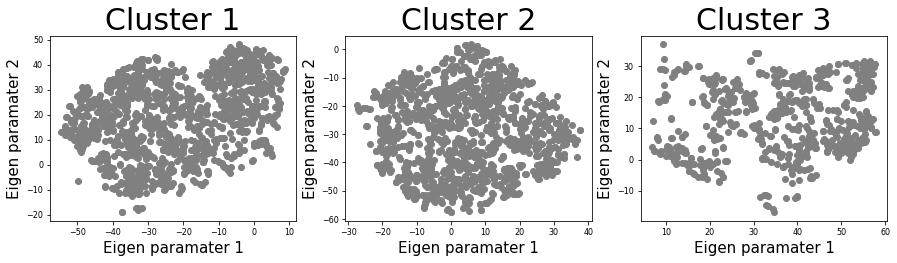

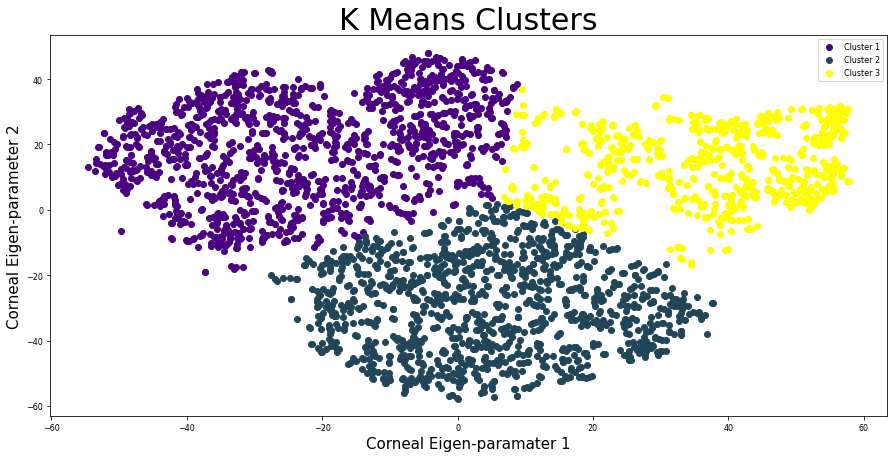

In [23]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,3.4))
ax1.scatter(tsne_data[kmeans_labels==0,0],tsne_data[kmeans_labels==0,1],c='gray')
ax1.set_title('Cluster 1')
ax1.set_xlabel('Eigen paramater 1')
ax1.set_ylabel('Eigen paramater 2')
ax2.scatter(tsne_data[kmeans_labels==1,0],tsne_data[kmeans_labels==1,1],c='gray')
ax2.set_title('Cluster 2')
ax2.set_xlabel('Eigen paramater 1')
ax2.set_ylabel('Eigen paramater 2')
ax3.scatter(tsne_data[kmeans_labels==2,0],tsne_data[kmeans_labels==2,1],c='gray')
ax3.set_title('Cluster 3')
ax3.set_xlabel('Eigen paramater 1')
ax3.set_ylabel('Eigen paramater 2')
plt.figure(figsize=(15,7))
plt.subplot
plt.scatter(tsne_data[kmeans_labels==0,0],tsne_data[kmeans_labels==0,1],c='indigo')
plt.scatter(tsne_data[kmeans_labels==1,0],tsne_data[kmeans_labels==1,1],c='#214659')
plt.scatter(tsne_data[kmeans_labels==2,0],tsne_data[kmeans_labels==2,1],c='yellow')
plt.xlabel('Corneal Eigen-paramater 1')
plt.ylabel('Corneal Eigen-parameter 2')
plt.title('K Means Clusters')
plt.legend(['Cluster 1','Cluster 2','Cluster 3'])
plt.show()

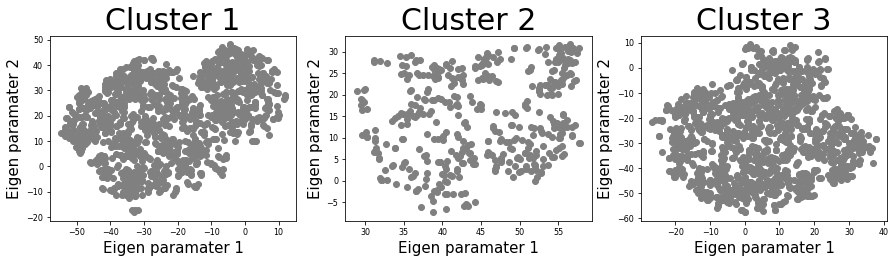

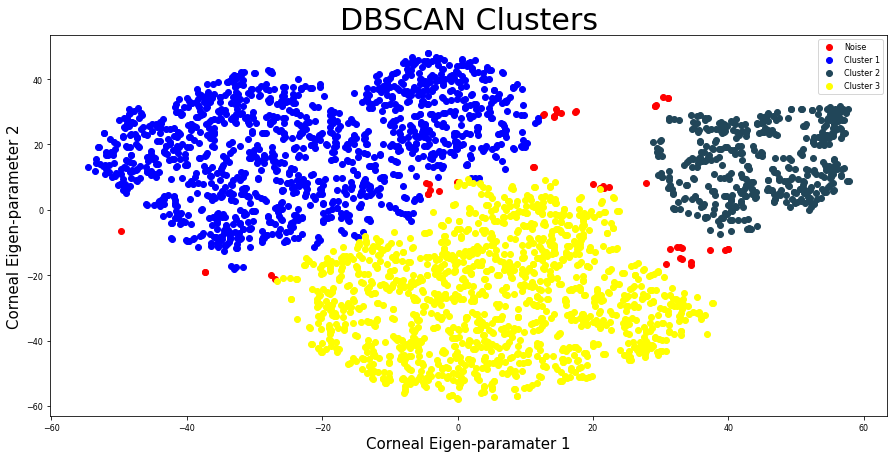

In [24]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,3.4))
ax1.scatter(tsne_data[dbscan_labels==0,0],tsne_data[dbscan_labels==0,1],c='gray')
ax1.set_title('Cluster 1')
ax1.set_xlabel('Eigen paramater 1')
ax1.set_ylabel('Eigen paramater 2')
ax2.scatter(tsne_data[dbscan_labels==1,0],tsne_data[dbscan_labels==1,1],c='gray')
ax2.set_title('Cluster 2')
ax2.set_xlabel('Eigen paramater 1')
ax2.set_ylabel('Eigen paramater 2')
ax3.scatter(tsne_data[dbscan_labels==2,0],tsne_data[dbscan_labels==2,1],c='gray')
ax3.set_title('Cluster 3')
ax3.set_xlabel('Eigen paramater 1')
ax3.set_ylabel('Eigen paramater 2')
plt.figure(figsize=(15,7))
plt.subplot
plt.scatter(tsne_data[dbscan_labels==-1,0],tsne_data[dbscan_labels==-1,1],c='red')
plt.scatter(tsne_data[dbscan_labels==0,0],tsne_data[dbscan_labels==0,1],c='blue')
plt.scatter(tsne_data[dbscan_labels==1,0],tsne_data[dbscan_labels==1,1],c='#214659')
plt.scatter(tsne_data[dbscan_labels==2,0],tsne_data[dbscan_labels==2,1],c='yellow')
plt.xlabel('Corneal Eigen-paramater 1')
plt.ylabel('Corneal Eigen-parameter 2')
plt.title('DBSCAN Clusters')
plt.legend(['Noise','Cluster 1','Cluster 2','Cluster 3'])
plt.show()

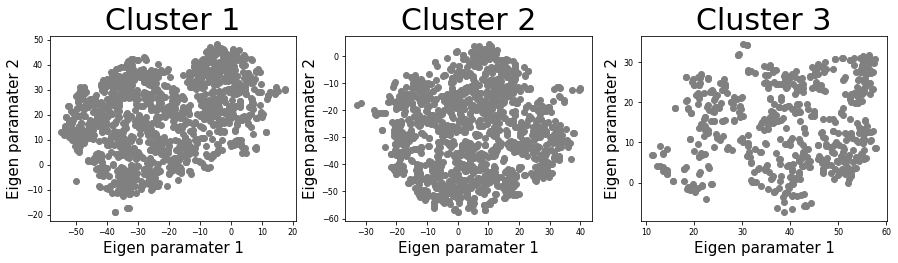

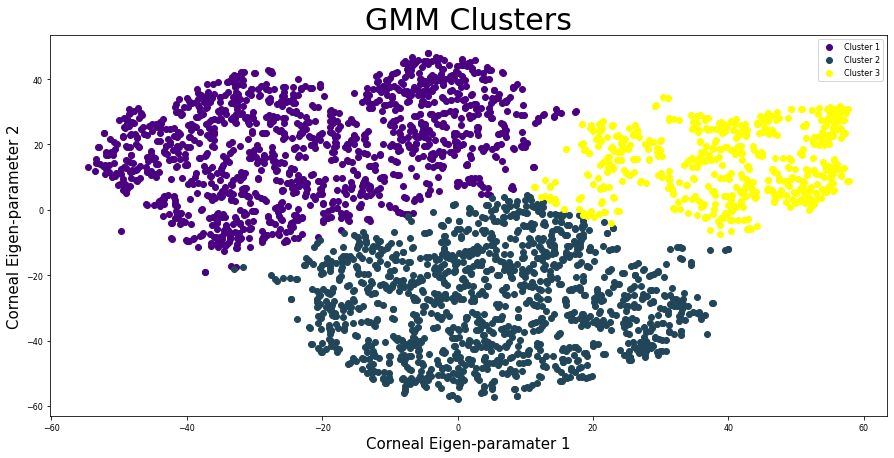

In [25]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,3.4))
ax1.scatter(tsne_data[gmm_labels==0,0],tsne_data[gmm_labels==0,1],c='gray')
ax1.set_title('Cluster 1')
ax1.set_xlabel('Eigen paramater 1')
ax1.set_ylabel('Eigen paramater 2')
ax2.scatter(tsne_data[gmm_labels==1,0],tsne_data[gmm_labels==1,1],c='gray')
ax2.set_title('Cluster 2')
ax2.set_xlabel('Eigen paramater 1')
ax2.set_ylabel('Eigen paramater 2')
ax3.scatter(tsne_data[gmm_labels==2,0],tsne_data[gmm_labels==2,1],c='gray')
ax3.set_title('Cluster 3')
ax3.set_xlabel('Eigen paramater 1')
ax3.set_ylabel('Eigen paramater 2')
plt.figure(figsize=(15,7))
plt.scatter(tsne_data[gmm_labels==0,0],tsne_data[gmm_labels==0,1],c='indigo')
plt.scatter(tsne_data[gmm_labels==1,0],tsne_data[gmm_labels==1,1],c='#214659')
plt.scatter(tsne_data[gmm_labels==2,0],tsne_data[gmm_labels==2,1],c='yellow')
plt.xlabel('Corneal Eigen-paramater 1')
plt.ylabel('Corneal Eigen-parameter 2')
plt.title('GMM Clusters')
plt.legend(['Cluster 1','Cluster 2','Cluster 3'])
plt.show()

In [26]:
df2=pd.DataFrame({'Eye ID':eye_labels,'Stage':kmeans_labels+1})
df2

,Eye ID,Stage
0,1OS(Left),3
1,1OD(Right),1
2,2OD(Right),1
3,4OS(Left),3
4,4OD(Right),1
...,...,...
3157,1812OD(Right),2
3158,1813OS(Left),1
3159,1813OD(Right),1
3160,1814OS(Left),1


In [27]:
# df2.to_csv('Keratoconus_stage.csv')

In [28]:
gmm_grid.best_estimator_

GaussianMixture(n_components=3, random_state=42)